In [8]:
# import simple_ebm
# from simple_ebm import NeuralNet, sample_langevin, ReplayBuffer
# import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import scipy.signal as sig
# from data import sample_2d_data
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
positions = np.repeat(np.linspace(0, 0.5, 101).reshape(101, 1, 1), 15, axis=1)

In [10]:
mirror_ratios = [np.tile(np.array([1]), [101, 15, 1]),
                 np.tile(np.array([1.47]), [101, 15, 1]),
                 np.tile(np.array([1.9]), [101, 15, 1]),
                 np.tile(np.array([2.3]), [101, 15, 1]),
                 np.tile(np.array([2.68]), [101, 15, 1])]

# n

In [11]:
datafiles = ["data/3-line_500G_isat.npz",
             "data/3-line_750G_isat.npz",
             "data/3-line_1000G_isat.npz",
             "data/3-line_1250G_isat.npz",
             "data/3-line_1500G_isat.npz"]

In [12]:
n = []
for f in datafiles: 
    n.append(np.load(f)['isat'].reshape(101, 15, -1)/1e11)

In [6]:
n[0].shape

(101, 15, 3136)

<IPython.core.display.Javascript object>


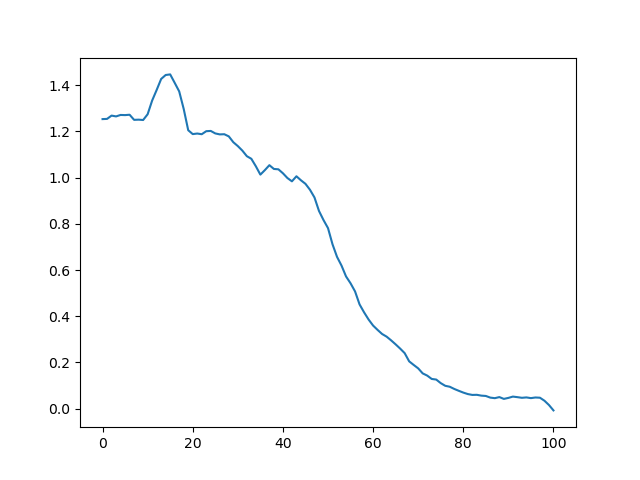

In [62]:
plt.figure()
# plt.loglog(np.mean(np.abs(np.fft.rfft(n[0][40:60, :, ::])[:, :, 0:3136//2])**2, axis=(0,1)))
# plt.loglog(np.mean(np.abs(np.fft.rfft(n_downsampled[0][40:60, :, ::])[:, :, 0:3136//2])**2, axis=(0,1)))
# plt.loglog(np.mean(np.abs(np.fft.rfft(n[2][40:60, :, ::7])[:, :, 0:3136//2])**2, axis=(0,1)))
# plt.loglog(np.mean(np.abs(np.fft.rfft(n[3][40:60, :, ::7])[:, :, 0:3136//2])**2, axis=(0,1)))
# plt.loglog(np.mean(np.abs(np.fft.rfft(n[4][40:60, :, ::7])[:, :, 0:3136//2])**2, axis=(0,1)))
plt.plot(np.mean(n[0], axis=(1,2)))

In [170]:
len(n_downsampled)

5

In [13]:
n_downsampled = []
for _ in n:
    n_downsampled.append(sig.decimate(_, 7, 7))

for i in range(len(n_downsampled)):
    n_downsampled[i]= (sig.decimate(n_downsampled[i], 7, 7))
    
for i in range(len(n_downsampled)):
    n_downsampled[i]= (sig.decimate(n_downsampled[i], 8, 2))

<IPython.core.display.Javascript object>


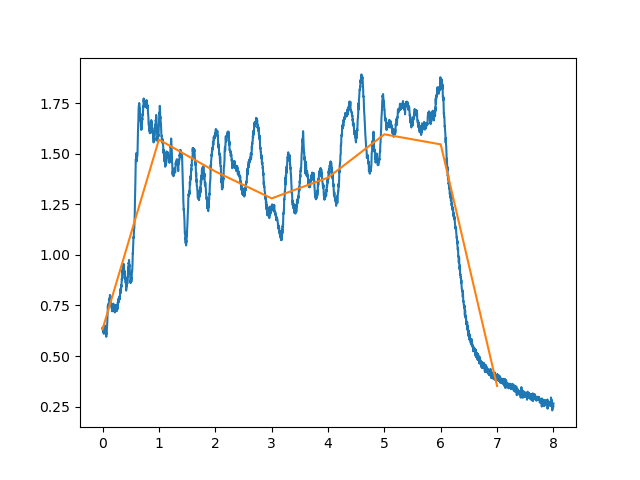

In [29]:
plt.figure()
plt.plot(np.linspace(0, 8, 3136), n[0][10, 0])
plt.plot(n_downsampled[0][10, 0])

In [15]:
n_downsampled_final = []
for i in range(5):
    n_downsampled_final.append(np.concatenate([positions,
                                             mirror_ratios[i] / 3.0,
                                             n_downsampled[i] / 3.0], axis=2))

In [43]:
np.array(n_downsampled_final).reshape(-1, 10)[15*101*3, 1]

0.7666666666666666

In [26]:
np.max(np.array(n_downsampled_final).reshape(-1, 10)[:, 1])

0.8933333333333334

In [28]:
np.savez("data/isat_downsampled_8_div3", n_downsampled_final)

# TE

In [67]:
Te_datafiles = ["data/3-line_500G_Te.npz",
                "data/3-line_750G_Te.npz",
                "data/3-line_1000G_Te.npz",
                "data/3-line_1250G_Te.npz",
                "data/3-line_1500G_Te.npz"]

In [79]:
Te = []
for f in Te_datafiles: 
    Te.append(np.load(f)['Te'].reshape(101, 15, -1))

In [104]:
Te_downsampled = []
for _ in Te:
    Te_downsampled.append(sig.decimate(_, 7, 7))

<IPython.core.display.Javascript object>


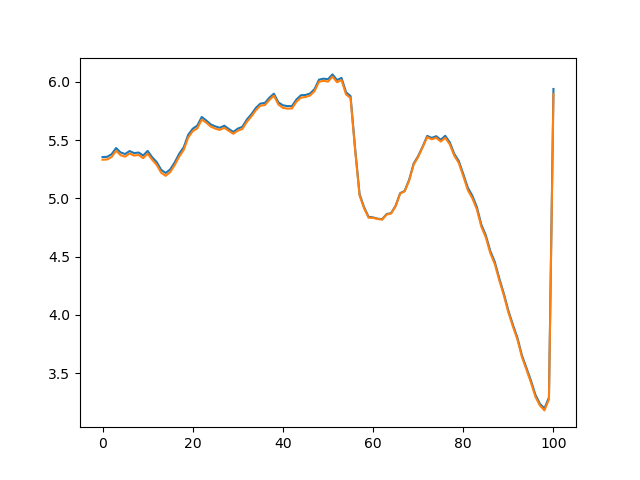

In [105]:
plt.figure()

plt.plot(np.mean(Te[0], axis=(1,2)))
plt.plot(np.mean(Te_downsampled[0], axis=(1,2)))

<IPython.core.display.Javascript object>


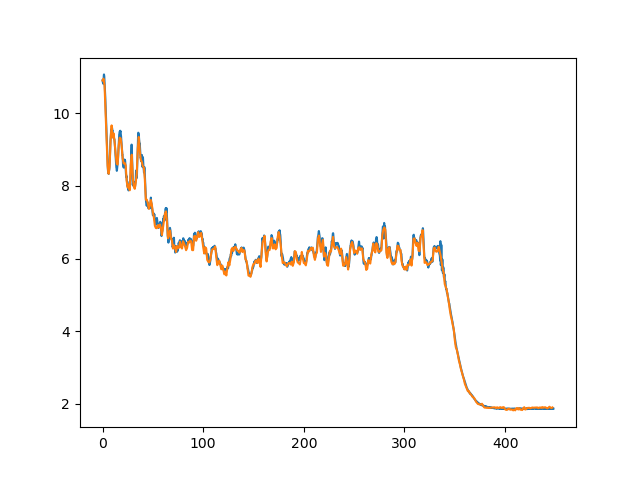

In [106]:
plt.figure()
plt.plot(np.linspace(0, 448, 3136), Te[0][30, 0])
plt.plot(Te_downsampled[0][30, 0])

In [159]:
for i in range(5):
    Te_downsampled[i] = np.concatenate([positions, mirror_ratios[i], Te_downsampled[i]], axis=2)

In [160]:
np.savez("data/Te_downsampled", Te_downsampled)